In [572]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('datasets/earthquake_data_tsunami.csv')

data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [573]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [574]:
data.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

In [575]:
data['magnitude'].value_counts()

magnitude
6.50    131
6.60    115
6.70     98
6.80     78
6.90     77
7.00     49
7.10     43
7.30     31
7.20     30
7.60     22
7.50     22
7.40     18
7.70     16
7.80     15
7.90      9
8.10      6
8.20      6
8.00      5
8.30      3
8.60      2
9.10      2
8.40      2
8.80      1
8.16      1
Name: count, dtype: int64

In [576]:
data['cdi'].value_counts()

cdi
0    212
5    107
7     97
8     86
6     77
9     66
4     62
3     47
1     14
2     14
Name: count, dtype: int64

In [577]:
data['mmi'].value_counts()

mmi
7    209
6    203
5    142
4     87
8     68
3     40
9     28
2      4
1      1
Name: count, dtype: int64

In [578]:
data['sig'].value_counts()

sig
650     50
670     41
691     36
711     25
776     18
        ..
1013     1
1026     1
1024     1
1750     1
1441     1
Name: count, Length: 339, dtype: int64

In [579]:
data['nst'].value_counts()

nst
0      365
282      4
398      4
518      4
385      3
      ... 
192      1
178      1
215      1
64       1
175      1
Name: count, Length: 312, dtype: int64

In [580]:
data['dmin'].value_counts()

dmin
0.000    405
2.705      2
2.045      2
0.828      2
0.289      2
        ... 
2.977      1
3.158      1
8.454      1
5.293      1
3.968      1
Name: count, Length: 369, dtype: int64

In [581]:
data['gap'].value_counts()

gap
0.0     70
18.0    23
16.0    22
22.0    22
12.0    20
        ..
26.7     1
19.1     1
19.4     1
28.7     1
38.4     1
Name: count, Length: 256, dtype: int64

In [582]:
data['Year'].value_counts()

Year
2013    53
2015    53
2014    48
2016    43
2018    43
2021    42
2010    41
2022    40
2007    37
2017    36
2011    34
2019    33
2004    32
2003    31
2012    31
2001    28
2005    28
2020    27
2009    26
2006    26
2008    25
2002    25
Name: count, dtype: int64

In [583]:
data['Month'].value_counts()

Month
11    80
9     80
4     77
1     70
10    69
8     68
3     63
2     63
5     58
7     56
12    56
6     42
Name: count, dtype: int64

Text(0, 0.5, 'Frequência')

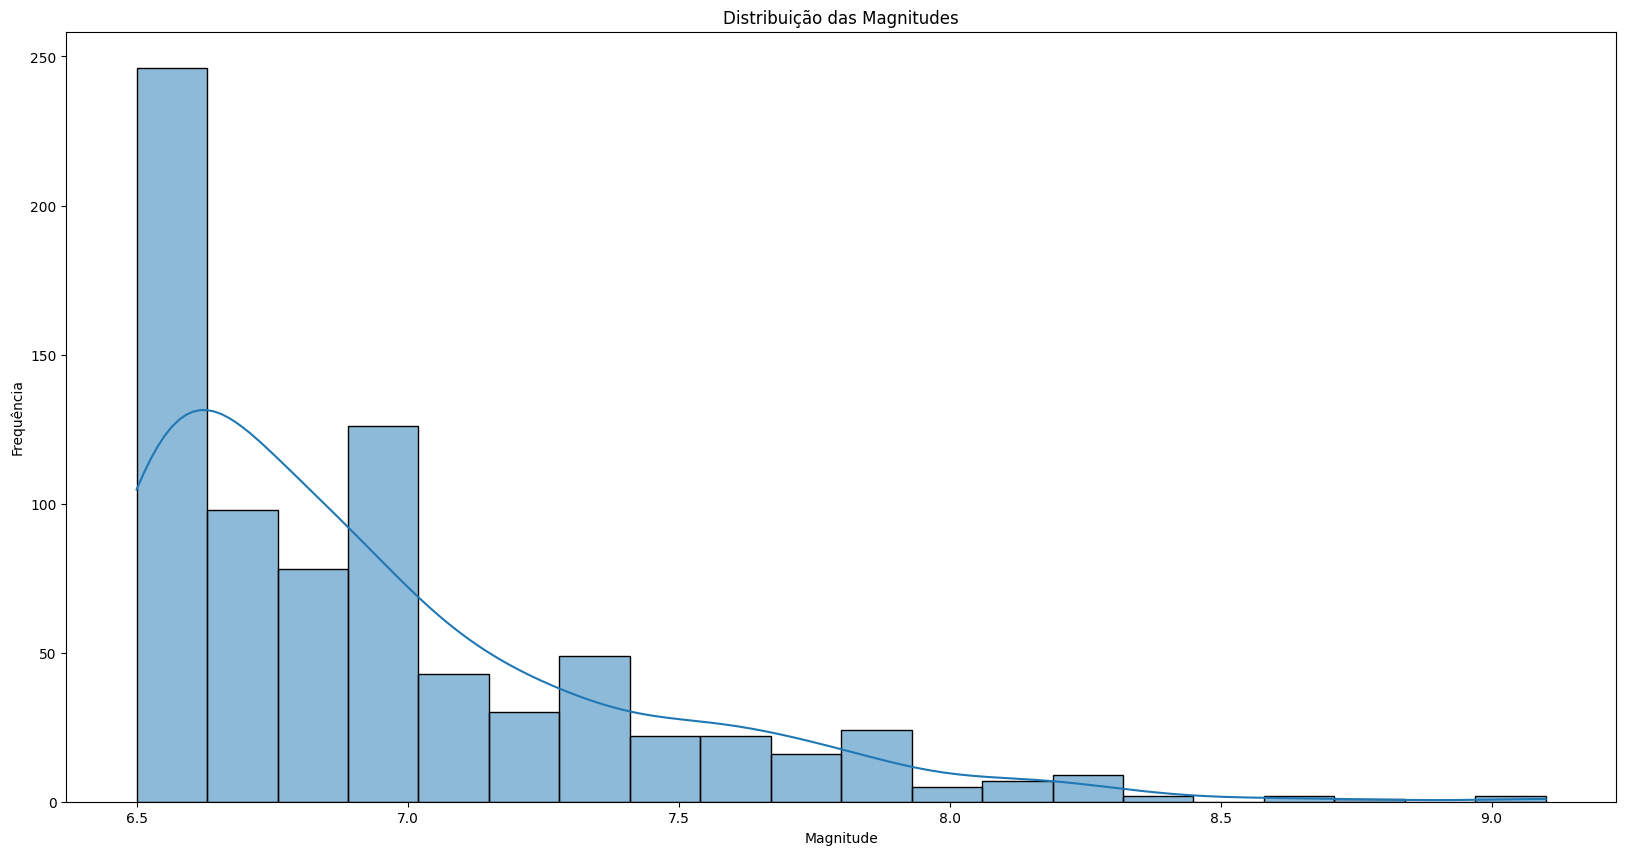

In [584]:
plt.figure(figsize=(20, 10))
sns.histplot(data['magnitude'], kde=True, bins=20)
plt.title("Distribuição das Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequência")

Text(0, 0.5, 'Contagem')

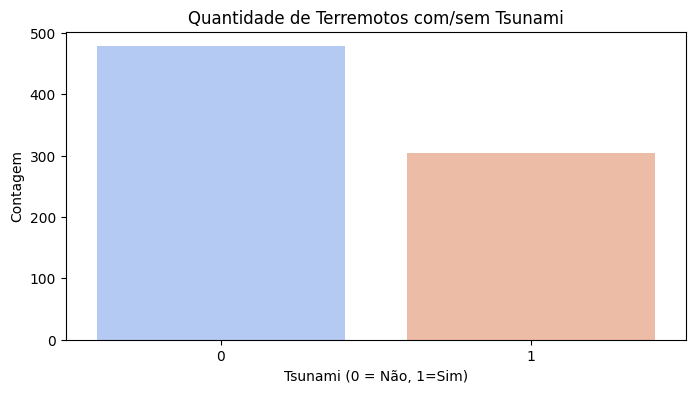

In [585]:
plt.figure(figsize=(8,4))
sns.countplot(x='tsunami', hue='tsunami', data=data, palette='coolwarm', legend=False)
plt.title("Quantidade de Terremotos com/sem Tsunami")
plt.xlabel("Tsunami (0 = Não, 1=Sim)")
plt.ylabel("Contagem")

Text(0, 0.5, 'Magnitude')

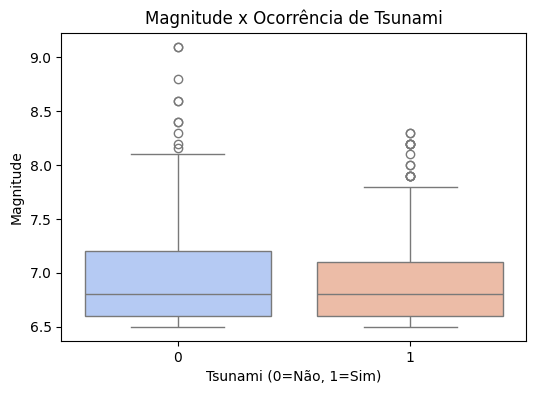

In [586]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x="tsunami", y="magnitude", palette="coolwarm", legend=False, hue='tsunami')
plt.title("Magnitude x Ocorrência de Tsunami")
plt.xlabel("Tsunami (0=Não, 1=Sim)")
plt.ylabel("Magnitude")

Text(0.5, 1.0, 'Mapa de Correlação')

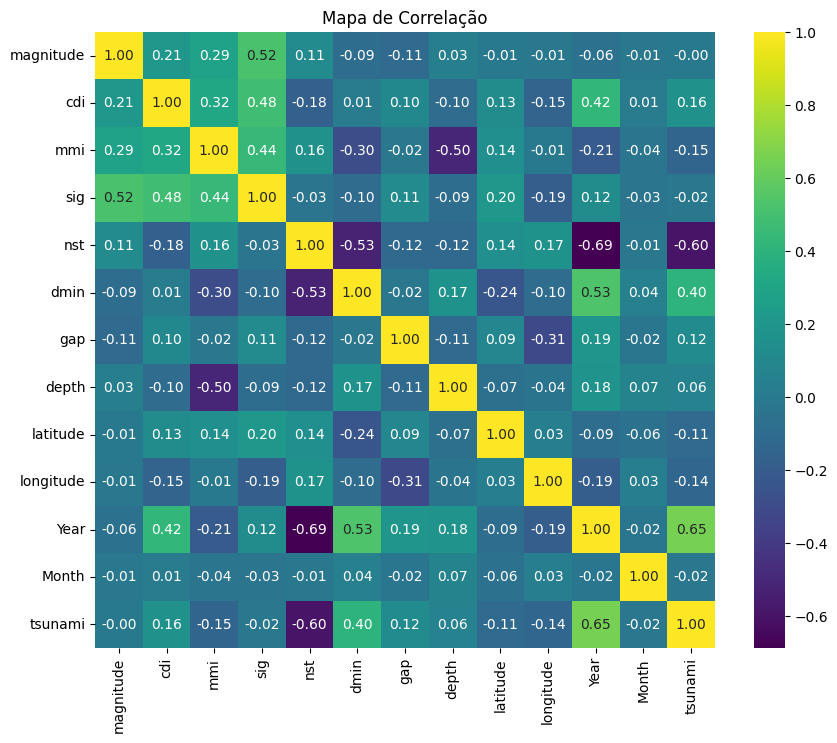

In [587]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="viridis", fmt=".2f")
plt.title("Mapa de Correlação")

Text(0, 0.5, 'Contagem')

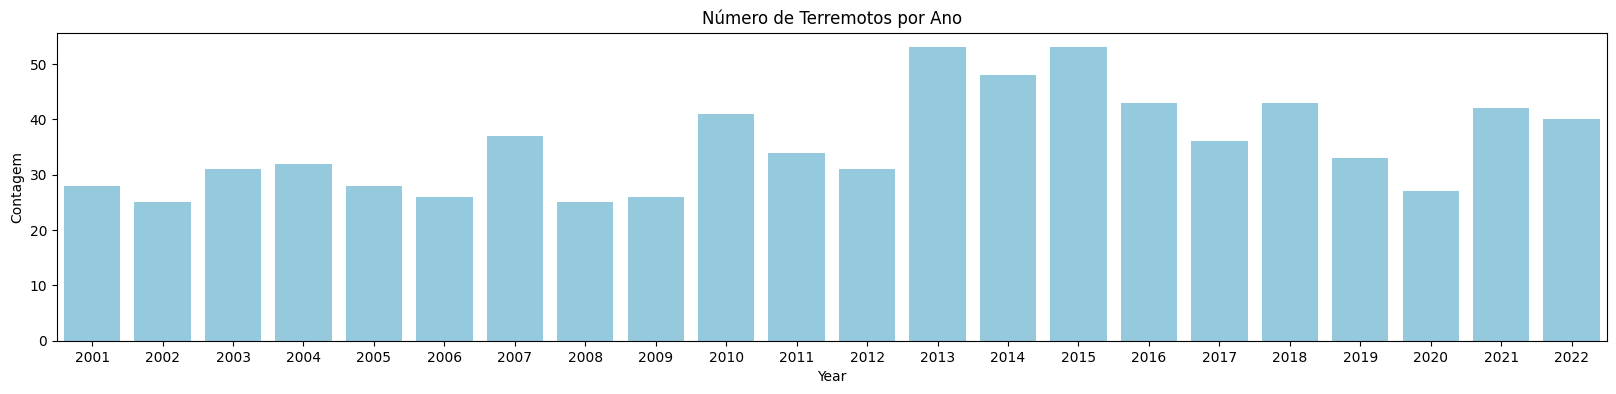

In [588]:
plt.figure(figsize=(20,4))
sns.countplot(x=data['Year'], color="skyblue", )
plt.title("Número de Terremotos por Ano")
plt.ylabel("Contagem")

In [589]:
X = data.drop('tsunami', axis=1)
y = data['tsunami']

In [590]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(f'Acurácia: {result}')

Acurácia: 0.9106382978723404


In [591]:
X_test[1:5]

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month
588,6.7,3,5,696,503,0.000,26.9,30.00,-1.9990,100.1410,2007,9
208,6.5,0,4,650,0,6.489,17.0,15.00,-56.4140,-25.7432,2017,5
291,7.0,8,6,759,0,5.205,22.0,11.00,-10.4012,165.1410,2015,7
174,6.9,7,8,1392,63,0.110,210.0,5.81,19.3182,-155.0000,2018,5


In [592]:
y_test[1:5]

588    0
208    1
291    1
174    1
Name: tsunami, dtype: int64

In [593]:
y_pred = model.predict(X_test[1:5])
print(f'Predicção {y_pred}')

Predicção [0 1 1 1]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print('MEAN: ', mae)
print('MSE: ', mse)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_rf = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))